<a href="https://colab.research.google.com/github/fersebas/Seminar-Innova-tsn/blob/main/2025_03_21_Practical_MLOps_Workshop_with_MLFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical MLOps Workshop with MLFlow

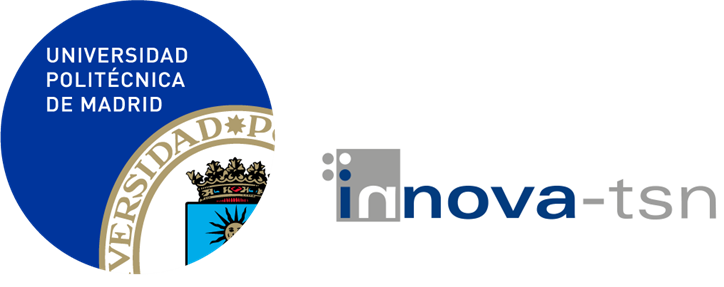

# Introduction

# ❓ What are we learning today?
- Why do we need MLflow/MLOps?
- What is MLflow?
- MLflow Tracking Functionality
  - Understanding Runs & Experiments
  - Logging Runs & Experiments
  - How and where are the runs recorded?
- Hands-on Experience using MLflow

In this workshop, we'll learn how to use **MLFlow** to manage the entire lifecycle of Machine Learning models—from experimentation and model selection to deployment and prediction on new data. **MLFlow** enables detailed, reproducible control over each experiment, facilitating collaboration and model comparisons.

**MLflow** simplifies ML workflows by **managing experiments, tracking parameters, and storing models, enhancing reproducibility and collaboration.**

Key Features:


*   Experiment Tracking: Log and compare parameters, metrics, and artifacts.
*   Model Packaging: Standardized format for easy sharing.
*   Model Deployment: Streamlined deployment options.





Do you often find yourself repeatedly pressing CTRL-Z, trying to recover that perfect piece of code or hyperparameters that gave you excellent accuracy before you ran a new experiment? Or have you struggled to reproduce experiments, never quite achieving the exact same results?

MLflow helps you tackle precisely these issues by tracking, managing, and reproducing your machine learning experiments with ease.

## Step 1: Install Dependencies

In [ ]:
pip install  mlflow


In [ ]:
pip install pyngrok

# Step 2: Import Libraries , run mlflow in background and configure NGROK.

Why we use Ngrok?

Ngrok is used with MLflow in Colab to create a secure public URL that exposes the local MLflow tracking server. This allows access to MLflow's UI from outside Colab since Colab sessions don't have a public address. It's an easy and temporary solution for remote access.

Load libraries necessary for working with data, training models, and recording results:

In [ ]:
import mlflow
from mlflow.models import infer_signature
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score


The next code block run mlflow in background.
1. Register in https://dashboard.ngrok.com/signup.

2. Login and copy token from https://dashboard.ngrok.com/get-started/your-authtoken

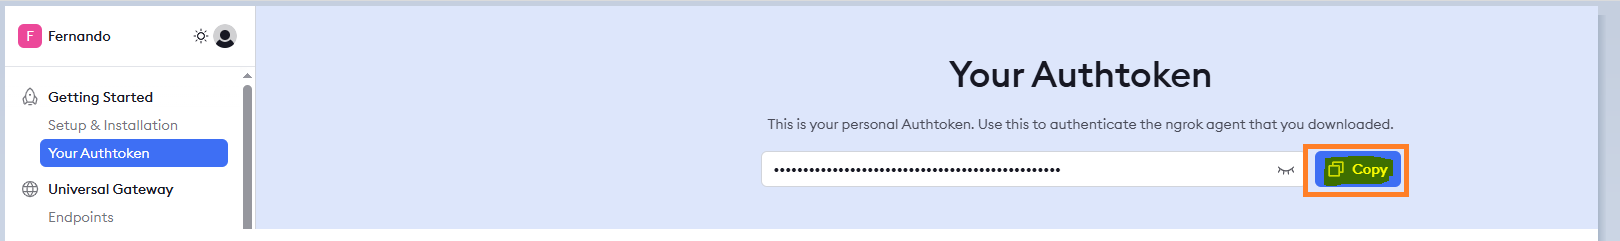


**1.Open the "Secrets" Panel:**

* In your Google Colab interface, click on the key icon in the sidebar to open the "Secrets" panel image.png. This icon represents the section where secrets like API keys can be managed.

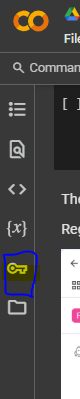

**2. Add a New Secret:**



*   Click on the orange button labeled "+ Add new secret". This will allow you to input the secret name and its corresponding value.

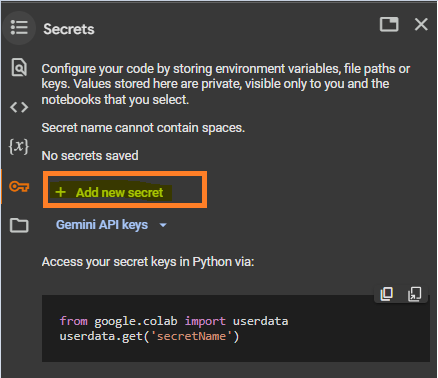

**3. Provide the Secret Details:**

* Enter a name for your secret (e.g., "NGROK") and its value (e.g., "your-secret-key-here", the one that you copy from ngrok web, similar to 2tqoXXXXXXXXXXXXXX).

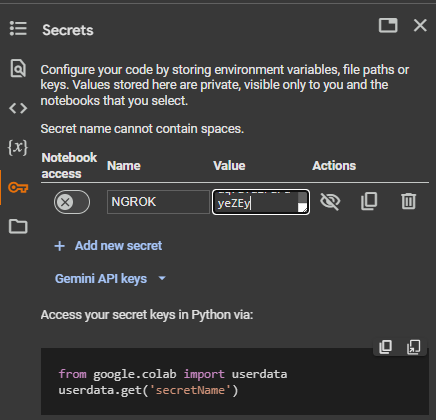

**4. Activate Notebook Access.**
* Next to the secret, there should be a toggle or option labeled "Notebook access" Enable this option to make the secret available in your current Colab notebook.

In [ ]:
from pyngrok import ngrok

get_ipython().system_raw("mlflow ui --port 5000 &")


# Terminate open tunnels if exist
ngrok.kill()
from google.colab import userdata
NGROK_AUTH_TOKEN  = userdata.get("NGROK")

ngrok.set_auth_token(NGROK_AUTH_TOKEN)

# Open an HTTPs tunnel on port 5000 for http://localhost:5000
ngrok_tunnel = ngrok.connect(addr="5000", proto="http", bind_tls=True)
print("MLflow Tracking UI:", ngrok_tunnel.public_url)
mlflow.set_tracking_uri("http://localhost:5000")


MLflow Tracking UI: https://5e84-34-60-143-193.ngrok-free.app


This is the link to acess Mlflow dashboard. We will visit this website/url after experiments.

# Step 3: Download data


We'll use sklearn's wine dataset for this example:

  Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/109/wine]. Irvine, CA: University of California, School of Information and Computer Science.

In [ ]:
X, y = load_wine(as_frame=False, return_X_y=True)

# Step 4:  Split the data

**Warning. Don't change seed in order to reproducibility between students.**

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=2025, stratify=y)

# Step 5: Register Experiments in MLFlow


Configure MLFlow to register experiments under the name **"Wine_Classification."**

In [ ]:
experiment_name = "Wine Classification"
mlflow.set_experiment(experiment_name)

<Experiment: artifact_location='mlflow-artifacts:/720114518893130837', creation_time=1742387870680, experiment_id='720114518893130837', last_update_time=1742387870680, lifecycle_stage='active', name='Wine Classification', tags={}>

Next, train several models with different configurations to compare performance:

In [ ]:
params_list = [
    {"n_estimators": 10, "max_depth": 4, "learning_rate": 0.1},
    {"n_estimators": 15, "max_depth": 6, "learning_rate": 0.05},
    {"n_estimators": 30, "max_depth": 8, "learning_rate": 0.03},
]

In [ ]:
for params in params_list:
    with mlflow.start_run():
        model = GradientBoostingClassifier(verbose=False, **params)
        model.fit(X_train, y_train)

        predictions = model.predict(X_valid)
        acc = accuracy_score(y_valid, predictions)
        f1 = f1_score(y_valid, predictions, average="weighted")
        # register mlflow
        mlflow.log_params(params)
        mlflow.log_metrics({"accuracy": acc, "f1_score": f1})
        mlflow.log_input(mlflow.data.from_numpy(X_train, source="wine_dataset"))

        signature = infer_signature(X_train, predictions)
        # register experiment
        mlflow.sklearn.log_model(model, "model", signature=signature)

/usr/local/lib/python3.11/dist-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'wine_dataset'. Exception: 
  return _dataset_source_registry.resolve(
/usr/local/lib/python3.11/dist-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(


🏃 View run youthful-doe-86 at: http://localhost:5000/#/experiments/720114518893130837/runs/403856a143af4fd88dd4db66a4aaa38b
🧪 View experiment at: http://localhost:5000/#/experiments/720114518893130837


/usr/local/lib/python3.11/dist-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'wine_dataset'. Exception: 
  return _dataset_source_registry.resolve(
/usr/local/lib/python3.11/dist-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(


🏃 View run capable-mole-565 at: http://localhost:5000/#/experiments/720114518893130837/runs/cf19262dd4844eb98af6318ab5dd2016
🧪 View experiment at: http://localhost:5000/#/experiments/720114518893130837


/usr/local/lib/python3.11/dist-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: Failed to determine whether UCVolumeDatasetSource can resolve source information for 'wine_dataset'. Exception: 
  return _dataset_source_registry.resolve(
/usr/local/lib/python3.11/dist-packages/mlflow/data/dataset_source_registry.py:149: UserWarning: The specified dataset source can be interpreted in multiple ways: LocalArtifactDatasetSource, LocalArtifactDatasetSource. MLflow will assume that this is a LocalArtifactDatasetSource source.
  return _dataset_source_registry.resolve(


🏃 View run dapper-panda-797 at: http://localhost:5000/#/experiments/720114518893130837/runs/5476d925eb7e4e13ba7a617e58ae82a0
🧪 View experiment at: http://localhost:5000/#/experiments/720114518893130837


**Note. Use the MLFlow graphical interface to view metrics and select the best.model.

Warning. In order to view the experiment you can go to ngrok link or replace here localhost for ngrok host.**

## Step 6: Select the Champion Model

Use MLFlow's graphical interface to compare models and manually select the one with the best metrics (e.g., highest F1-score).

Go to link MLflow Tracking UI:
Click visit site
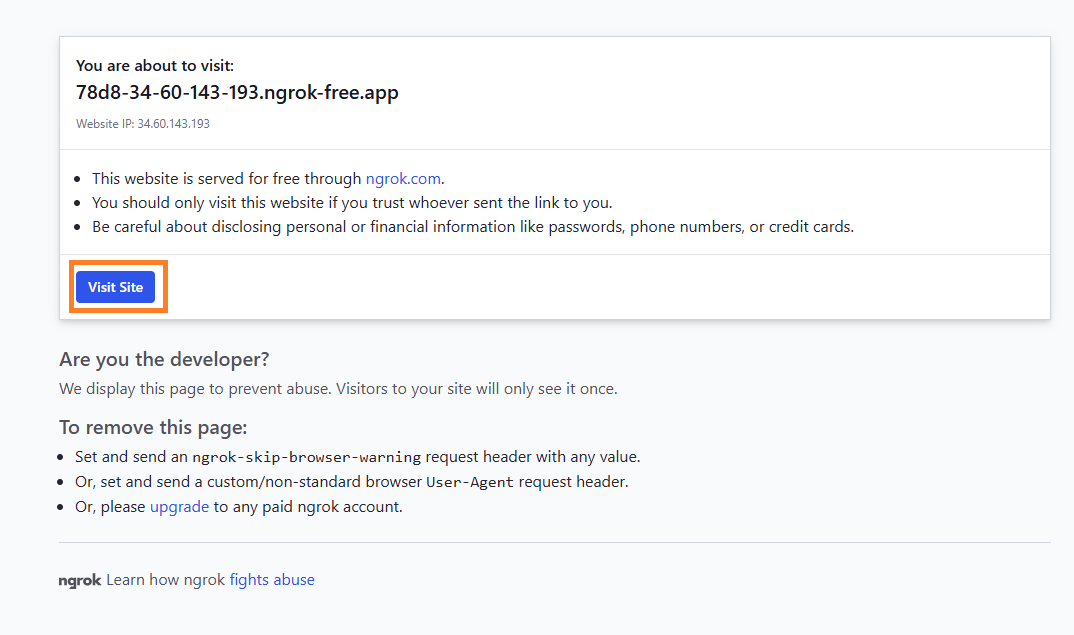

Then go to experiment Wine Classification and select aditional columns.
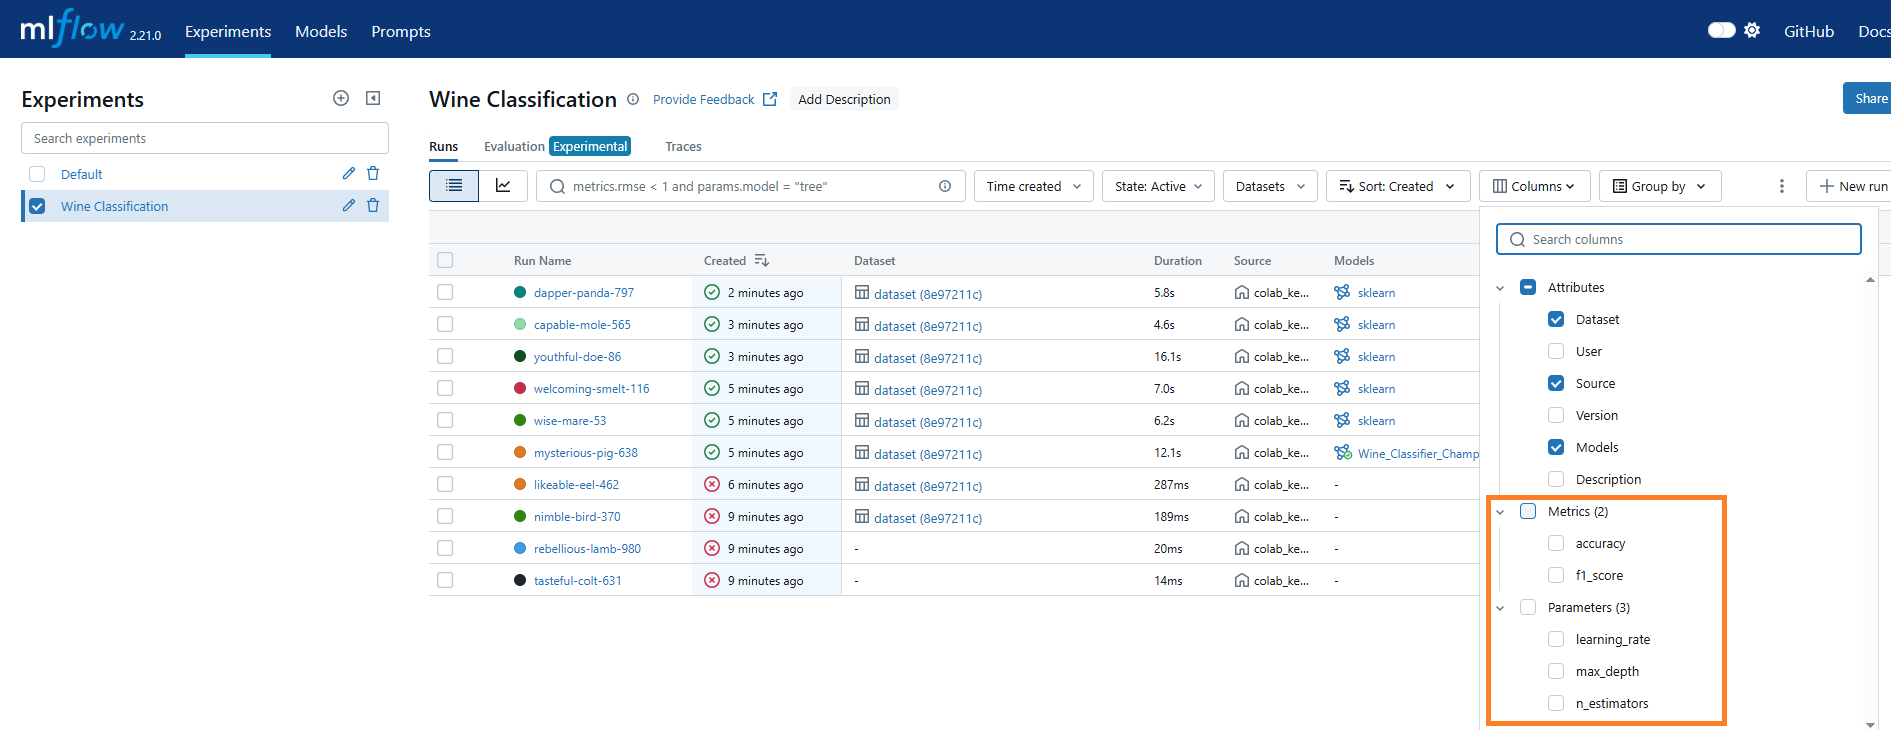

You will see something like this:

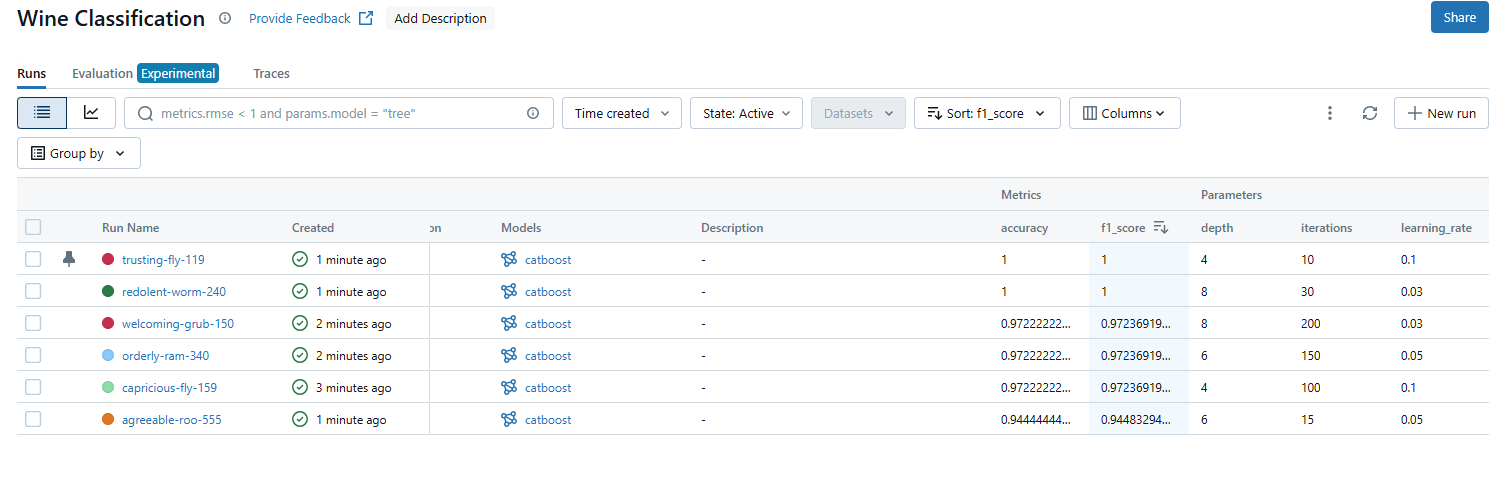


## Step 7: Select and Register the Champion Model

Once you've selected your model, note its RUN ID and load it to make predictions:

#  !!!!!!!!!!!!!!!!!!!!!!!!!Replace with your champion model's RUN ID. You will find inside each Run Name.

Example: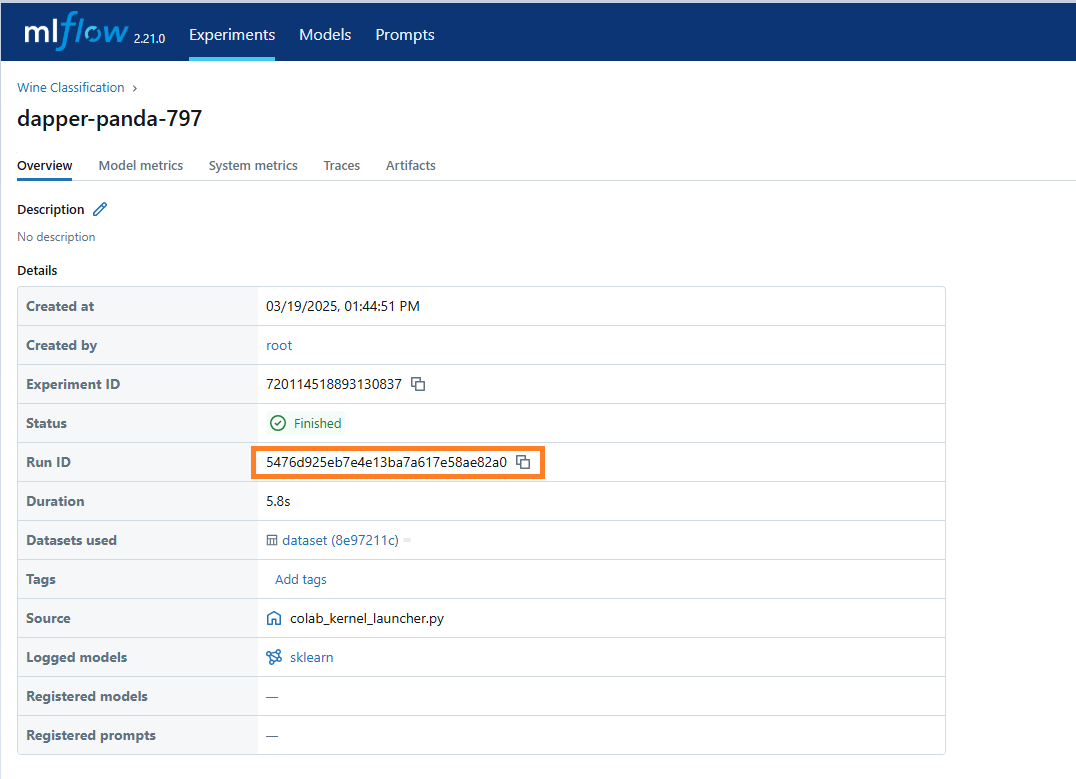

In [ ]:

best_run_id = "5476d925eb7e4e13ba7a617e58ae82a0"  # !!!!!!!!!!!!!!!!!!!!!!!!!Replace with your champion model's RUN ID
model_uri = f"runs:/{best_run_id}/model"
model_champion = mlflow.pyfunc.load_model(model_uri)

mlflow.register_model(model_uri, "Wine_Classifier_Champion")

Registered model 'Wine_Classifier_Champion' already exists. Creating a new version of this model...
2025/03/19 12:50:11 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Wine_Classifier_Champion, version 2
Created version '2' of model 'Wine_Classifier_Champion'.


<ModelVersion: aliases=[], creation_timestamp=1742388611004, current_stage='None', description='', last_updated_timestamp=1742388611004, name='Wine_Classifier_Champion', run_id='5476d925eb7e4e13ba7a617e58ae82a0', run_link='', source='mlflow-artifacts:/720114518893130837/5476d925eb7e4e13ba7a617e58ae82a0/artifacts/model', status='READY', status_message=None, tags={}, user_id='', version='2'>

## Step 8:  Load and Deploy the Champion Model


Now, load your registered model to make predictions:

In [ ]:

model_uri = "models:/Wine_Classifier_Champion/latest"
model_champion = mlflow.pyfunc.load_model(model_uri)

# Step 9: Predict New Data
Make predictions on new data using the deployed champion model:

*Experiment by changing or expanding the new data input.*

In [ ]:
new_data = X_valid[:5]  # Simulating new data
new_predictions = model_champion.predict(new_data)
print("Predictions for new data:", new_predictions)
print("Reals for new data:", y_valid[:5])

Predictions for new data: [0 2 2 2 1]
Reals for new data: [0 2 2 2 1]


# Exercise
Train different experiments varying the number of iterations, keeping the depth fixed at 4 and the learning rate fixed at 0.1. Name these experiments "Exercise". Try to achieve the best possible F1 score with the fewest iterations. **Send a screenshot of your MLflow run, including the registered champion model, to fernando.sebastian@innova-tsn.com.**

In [ ]:
# Insert your code across multiple cells as needed


## Conclusion

You now have a complete guide to managing experiments with MLFlow, from experimentation to prediction. We encourage you to try different configurations and further explore MLFlow's features.
